In [1]:
import csv

In [2]:
import datetime

In [3]:
with open('lyngby-kommune-privat-forbrug.csv', newline='') as csvfile:
    datareader = csv.DictReader(csvfile, delimiter=';')
    d = [(row["HourDK"], float(row["ConsumptionkWh"].replace(",", "."))) for row in datareader]
    #print(d)

In [4]:
months = range(1,13)
summermonths = list(range(4,10))
wintermonths = [month for month in months if month not in summermonths]
display(summermonths, wintermonths)

[4, 5, 6, 7, 8, 9]

[1, 2, 3, 10, 11, 12]

In [5]:
def summer_or_winter(date):
    month = date.split("-")[1].removeprefix("0")
    return "summer" if int(month) in summermonths else "winter"

In [6]:
def hour_from_date(date):
    return date.split(" ")[1].split(":")[0]

In [7]:
def summer_or_winter_and_hour(date):
    return f"{summer_or_winter(date)}-{hour_from_date(date)}"

In [8]:
summer_or_winter_and_hour("2024-07-23 01:00:00")

'summer-01'

In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('lyngby-kommune-privat-forbrug.csv', decimal=",", sep=";")

In [11]:
data

HourDK  ConsumptionkWh
0     2023-01-01 00:00        7798.710
1     2023-01-01 01:00        7692.280
2     2023-01-01 02:00        7446.660
3     2023-01-01 03:00        6855.040
4     2023-01-01 04:00        6027.160
...                ...             ...
8755  2023-12-31 19:00       14103.147
8756  2023-12-31 20:00       12084.102
8757  2023-12-31 21:00       11017.397
8758  2023-12-31 22:00       10185.567
8759  2023-12-31 23:00        9554.279

[8760 rows x 2 columns]

In [12]:
#data.groupby(lambda s: s.split(' ')[0]).sum()

In [13]:
season = data["HourDK"].map(summer_or_winter)
hour = data["HourDK"].map(hour_from_date)

In [14]:
season_sums = data["ConsumptionkWh"].groupby(season).sum()

In [15]:
season_hour_grouped = data["ConsumptionkWh"].groupby([season, hour])

In [16]:
percentages_of_day = season_hour_grouped.transform(lambda x: (x / season_sums[x.name[0]]).sum())

In [27]:
yearHourPercentagesofDay = pd.DataFrame.from_dict({"HourDK": data["HourDK"], "PercentageOfDay": percentages_of_day}).set_index("HourDK")

In [29]:
yearHourPercentagesofDay.to_csv("PercentagesOfDay.csv", sep=";", decimal=",")

In [17]:
#percentages_of_day.groupby(season).apply(lambda val: val.groupby(hour).mean()).rename_axis(["Season", "HourOfDay"]).to_frame().unstack(level=0)

In [18]:
df = pd.DataFrame.from_dict({key: val.groupby(hour).mean() for key, val in percentages_of_day.groupby(season)}).rename_axis("HourOfDay")
df

summer    winter
HourOfDay                    
00         0.038668  0.039628
01         0.038018  0.040194
02         0.036079  0.038683
03         0.032919  0.035507
04         0.029099  0.031311
05         0.027133  0.028782
06         0.031351  0.032225
07         0.036998  0.037788
08         0.038993  0.038940
09         0.039895  0.039487
10         0.040025  0.039074
11         0.040752  0.039068
12         0.042043  0.039429
13         0.042454  0.039196
14         0.042269  0.039534
15         0.042205  0.041169
16         0.045227  0.046590
17         0.054805  0.057745
18         0.059951  0.061828
19         0.054981  0.055217
20         0.051057  0.049869
21         0.049248  0.047023
22         0.045537  0.042944
23         0.040293  0.038771

<Axes: xlabel='HourOfDay'>

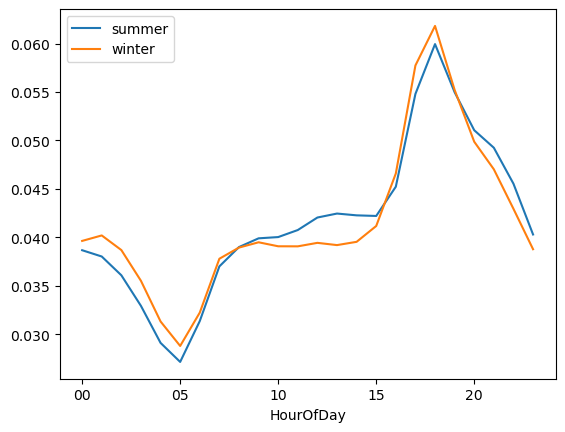

In [19]:
df.plot()

In [20]:
df.to_csv("DagsTimeFordeling.csv", sep=";", decimal=",")

<Axes: xlabel='HourOfDay'>

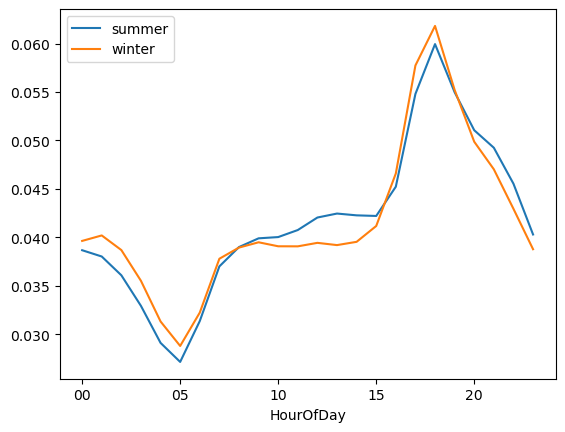

In [22]:
df.plot()